# Part I: Supervised Learning

In [ ]:
pip install imblearn

In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

# Reading the dataset
df = pd.read_csv(r"C:\Users\Jayam\Documents\bank.csv")



In [ ]:
df.head()

In [ ]:
df.info()

In [ ]:
df.columns

## Q1.What does the primary analysis of several categorical features reveal?

In [ ]:
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']
for feature in categorical_features:
 print(f"{feature}:")
 print(df[feature].value_counts())
 print("\n")

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# plot the count of each categorical feature
for feature in categorical_features:
    plt.figure(figsize=(12,6))
    sns.countplot(x=feature, data=df)
    plt.title(f"Distribution of {feature}")
    plt.show()

Primary analysis of several categorical features reveals:
1.Admin and tech opened the deposit most of all.
2.Although in absolute terms married consumers more often agreed to the service, in relative terms the single was responded better.
3.Best communication channel is cellular.
4.The difference is evident between consumers who already use the services of banks and received a loan.
5.Home ownership does not affect marketing company performance.

## Q2. Perform the following Exploratory Data Analysis tasks:
* a. Missing Value Analysis
* b. Label Encoding wherever required
* c. Selecting important features based on Random Forest
* d. Handling unbalanced data using SMOTE
* e. Standardize the data using the anyone of the scalers provided by sklearn

In [19]:
# a.Missing value analysis
print(df.isna().sum())



age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


In [20]:
# b.Label encoding
label_encoder = LabelEncoder()
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
for feature in categorical_features:
    df[feature] = label_encoder.fit_transform(df[feature])


In [21]:
# c.Selecting important features based on Random Forest
X = df.drop('y', axis=1)
y = df['y']
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X, y)
important_features = pd.Series(data=rfc.feature_importances_, index=X.columns).sort_values(ascending=False)
print(important_features)



duration          0.322205
euribor3m         0.102378
age               0.092458
nr.employed       0.065854
job               0.048379
education         0.043033
campaign          0.042856
day_of_week       0.040689
pdays             0.034339
poutcome          0.029780
cons.conf.idx     0.028227
marital           0.023406
cons.price.idx    0.022418
housing           0.020226
emp.var.rate      0.019809
month             0.017266
loan              0.014996
previous          0.013527
contact           0.009263
default           0.008894
dtype: float64


In [22]:
# d.Handling unbalanced data using SMOTE
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)
print(f"Class distribution before SMOTE: {y.value_counts()}")
print(f"Class distribution after SMOTE: {y_smote.value_counts()}")



Class distribution before SMOTE: no     36548
yes     4640
Name: y, dtype: int64
Class distribution after SMOTE: no     36548
yes    36548
Name: y, dtype: int64


In [23]:
# e.Standardizing the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Q3. Build the following Supervised Learning models:
* a. Logistic Regression
* b. AdaBoost
* c. Naïve Bayes
* d. KNN
* e. SVM

In [25]:
# import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# separate features and target variable
X = df.drop(['y'], axis=1)
y = df['y']

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# instantiate models
logreg = LogisticRegression()
adaboost = AdaBoostClassifier()
nb = GaussianNB()
knn = KNeighborsClassifier()
svm = SVC()

# fit models on training data
logreg.fit(X_train, y_train)
adaboost.fit(X_train, y_train)
nb.fit(X_train, y_train)
knn.fit(X_train, y_train)
svm.fit(X_train, y_train)

# make predictions on test data
y_pred_logreg = logreg.predict(X_test)
y_pred_adaboost = adaboost.predict(X_test)
y_pred_nb = nb.predict(X_test)
y_pred_knn = knn.predict(X_test)
y_pred_svm = svm.predict(X_test)

# evaluate models using accuracy score
from sklearn.metrics import accuracy_score

print("Accuracy score for Logistic Regression:", accuracy_score(y_test, y_pred_logreg))
print("Accuracy score for AdaBoost:", accuracy_score(y_test, y_pred_adaboost))
print("Accuracy score for Naïve Bayes:", accuracy_score(y_test, y_pred_nb))
print("Accuracy score for KNN:", accuracy_score(y_test, y_pred_knn))
print("Accuracy score for SVM:", accuracy_score(y_test, y_pred_svm))


c:\Users\Jayam\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy score for Logistic Regression: 0.909686817188638
Accuracy score for AdaBoost: 0.9089584850691915
Accuracy score for Naïve Bayes: 0.8505705268268997
Accuracy score for KNN: 0.902282107307599
Accuracy score for SVM: 0.8945132313668366


## Q4. Tabulate the performance metrics of all the above models and tell which model performs better in predicting if the client will subscribe to term deposit or not

In [17]:
from sklearn.metrics import confusion_matrix, classification_report
# evaluate models using confusion matrix and classification report
print("Confusion matrix and classification report for Logistic Regression:\n")
print(confusion_matrix(y_test, y_pred_logreg))
print(classification_report(y_test, y_pred_logreg))

print("Confusion matrix and classification report for AdaBoost:\n")
print(confusion_matrix(y_test, y_pred_adaboost))
print(classification_report(y_test, y_pred_adaboost))

print("Confusion matrix and classification report for Naïve Bayes:\n")
print(confusion_matrix(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))

print("Confusion matrix and classification report for KNN:\n")
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

print("Confusion matrix and classification report for SVM:\n")
print(confusion_matrix(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

Confusion matrix and classification report for Logistic Regression:

[[7113  190]
 [ 554  381]]
              precision    recall  f1-score   support

          no       0.93      0.97      0.95      7303
         yes       0.67      0.41      0.51       935

    accuracy                           0.91      8238
   macro avg       0.80      0.69      0.73      8238
weighted avg       0.90      0.91      0.90      8238

Confusion matrix and classification report for AdaBoost:

[[7115  188]
 [ 562  373]]
              precision    recall  f1-score   support

          no       0.93      0.97      0.95      7303
         yes       0.66      0.40      0.50       935

    accuracy                           0.91      8238
   macro avg       0.80      0.69      0.72      8238
weighted avg       0.90      0.91      0.90      8238

Confusion matrix and classification report for Naïve Bayes:

[[6432  871]
 [ 360  575]]
              precision    recall  f1-score   support

          no       0.9

# Part II: Time Series

## Q1.Get the modal price of onion for each month for the Mumbai market (Hint: set monthly date as index and drop redundant columns)

In [26]:
# Read the CSV file into a pandas DataFrame
df = pd.read_csv(r"C:\Users\Jayam\Documents\MonthWiseMarketArrivals_Clean.csv")




In [ ]:
df.head()

In [ ]:
df.info()

In [28]:

mumbai_df = df[df['market'] == 'MUMBAI']
mumbai_df.set_index(pd.to_datetime(mumbai_df['date']), inplace=True)


mumbai_df.drop(['market', 'year', 'quantity', 'priceMin', 'priceMax', 'state', 'city', 'date'], axis=1, inplace=True)


monthly_modal_price = mumbai_df.resample('M').agg({'priceMod': 'mean'})

print(monthly_modal_price)


            priceMod
date                
2004-01-31     849.0
2004-02-29     736.0
2004-03-31     498.0
2004-04-30     397.0
2004-05-31     405.0
...              ...
2015-10-31    3748.0
2015-11-30    2623.0
2015-12-31    1542.0
2016-01-31    1215.0
2016-02-29    1128.0

[146 rows x 1 columns]


C:\Users\Jayam\AppData\Local\Temp\ipykernel_504\2166189147.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mumbai_df.drop(['market', 'year', 'quantity', 'priceMin', 'priceMax', 'state', 'city', 'date'], axis=1, inplace=True)


C:\Users\Jayam\AppData\Local\Temp\ipykernel_504\411680803.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mumbai_df.drop(['market', 'year', 'quantity', 'priceMin', 'priceMax', 'state', 'city', 'date'], axis=1, inplace=True)


RMSE: 3058.370771686249


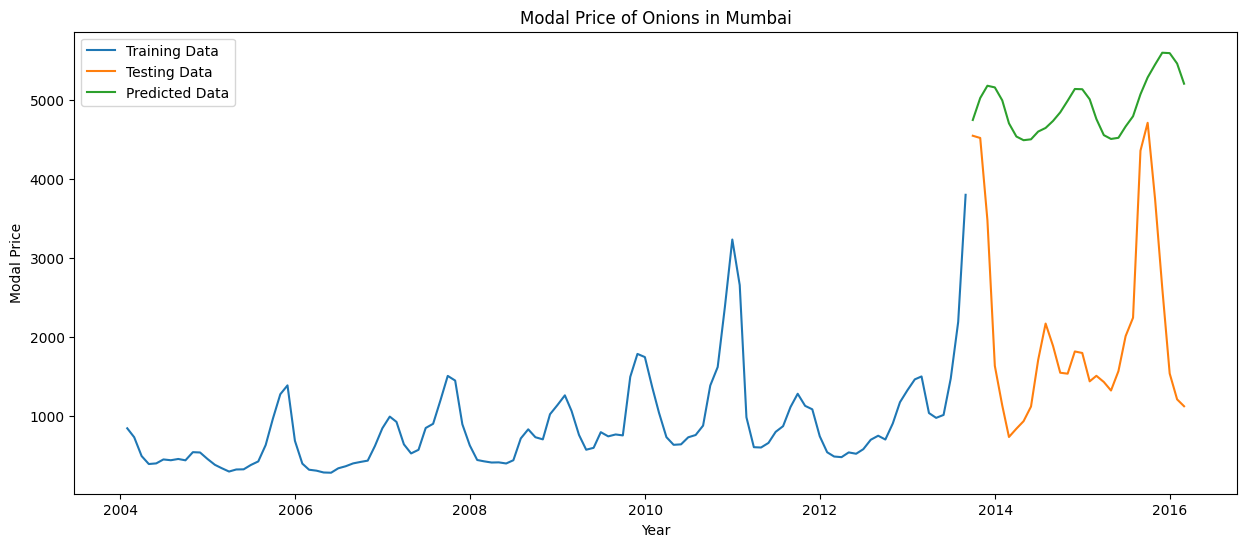

In [32]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

df = pd.read_csv(r"C:\Users\Jayam\Documents\MonthWiseMarketArrivals_Clean.csv")
mumbai_df = df[df['market'] == 'MUMBAI']
mumbai_df.set_index(pd.to_datetime(mumbai_df['date']), inplace=True)
mumbai_df.drop(['market', 'year', 'quantity', 'priceMin', 'priceMax', 'state', 'city', 'date'], axis=1, inplace=True)
monthly_modal_price = mumbai_df.resample('M').agg({'priceMod': 'mean'})
train_size = int(len(monthly_modal_price) * 0.8)
train_data, test_data = monthly_modal_price[0:train_size], monthly_modal_price[train_size:len(monthly_modal_price)]
model = SARIMAX(train_data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
model_fit = model.fit()
predictions = model_fit.predict(start=len(train_data), end=len(monthly_modal_price)-1, dynamic=False)
rmse = np.sqrt(mean_squared_error(test_data, predictions))
print('RMSE:', rmse)
plt.figure(figsize=(15, 6))
plt.plot(train_data.index, train_data, label='Training Data')
plt.plot(test_data.index, test_data, label='Testing Data')
plt.plot(test_data.index, predictions, label='Predicted Data')
plt.xlabel('Year')
plt.ylabel('Modal Price')
plt.title('Modal Price of Onions in Mumbai')
plt.legend()
plt.show()


In [36]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf


c:\Users\Jayam\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


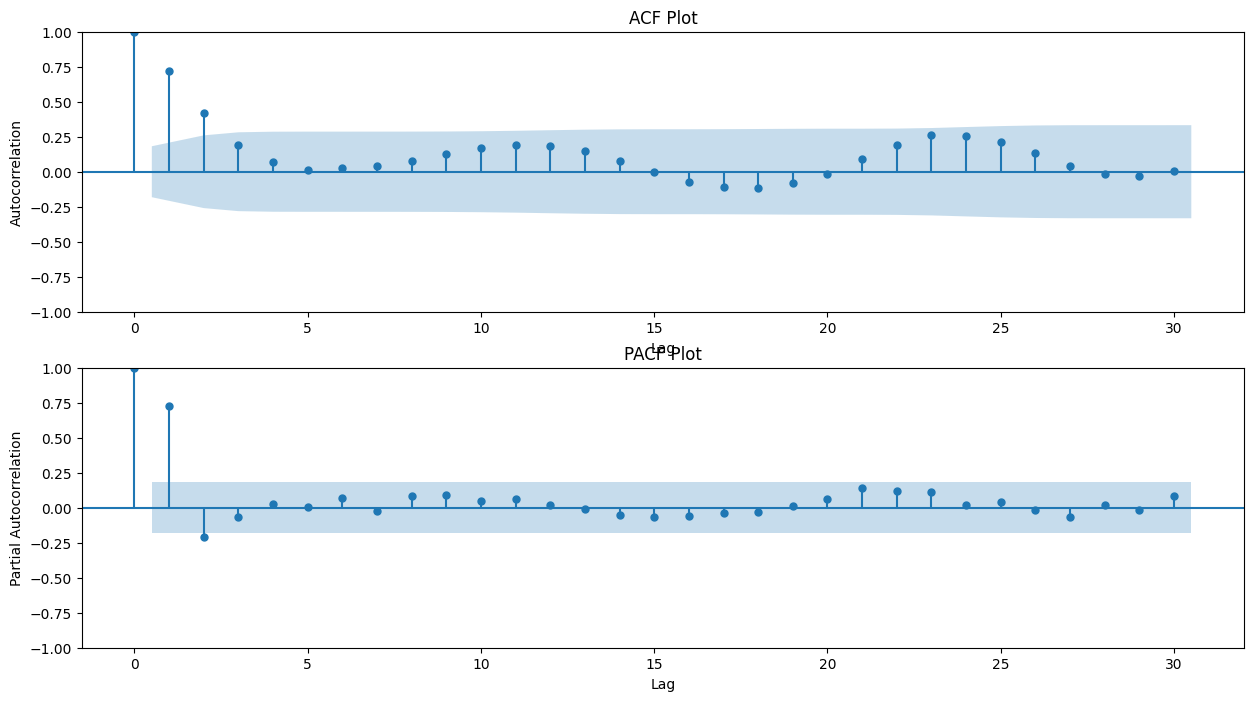

In [37]:
fig, ax = plt.subplots(2,1,figsize=(15,8))
plot_acf(train_data, ax=ax[0], lags=30)
ax[0].set_xlabel('Lag')
ax[0].set_ylabel('Autocorrelation')
ax[0].set_title('ACF Plot')
plot_pacf(train_data, ax=ax[1], lags=30)
ax[1].set_xlabel('Lag')
ax[1].set_ylabel('Partial Autocorrelation')
ax[1].set_title('PACF Plot')
plt.show()


In [38]:

from statsmodels.tsa.holtwinters import ExponentialSmoothing
model = ExponentialSmoothing(train_data, seasonal='add', seasonal_periods=12).fit()
predictions = model.forecast(len(test_data))
rmse = np.sqrt(mean_squared_error(test_data, predictions))
print('RMSE:', rmse)



RMSE: 1919.4285279747141
